In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from scipy import spatial
root = '/content/drive/Shareddrives/Imagenes/TP6 Grupo1/'

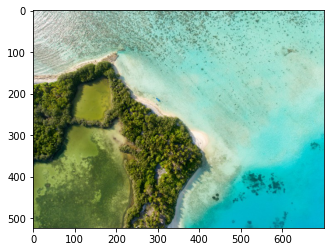

In [85]:
colors_1 = plt.imread(root+'colors3.jpeg')
plt.imshow(colors_1);

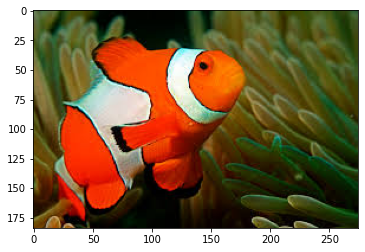

In [93]:
nemo = plt.imread(root+'nemo0.jpg')
plt.imshow(nemo);

In [104]:
class KMeans:
  def __init__(self, src: np.array=None, downscale=10):
    self.image_original = src.copy()
    self.height_original, self.width_original, _ = self.image_original.shape
    self.preprocess_image(downscale=downscale)
    return
  
  def cluster_colors(self, k=10, iterations=10):
    centroids = self.compute_centroids(k, iterations)
    canvas = np.zeros_like(self.image_original)
    image_original_hsv = cv.cvtColor(self.image_original, cv.COLOR_RGB2HSV)
    for i in range(self.height_original):
        for j in range(self.width_original):
          pixel = image_original_hsv[i][j]
          asigned_cluster = self.classify_point(np.array(pixel), centroids)
          canvas[i][j] = centroids[asigned_cluster]
    canvas = cv.cvtColor(canvas, cv.COLOR_HSV2RGB) 
    return canvas

  def compute_centroids(self, k, iterations):
    centroids = self.generate_random_centroids(k)
    print(f"initial centroids {centroids}")
    clusters = {cluster_i:[] for cluster_i in range(k)}
    for iteration in range(iterations):
      print(f"iteration {iteration}")
      for i in range(self.height):
        for j in range(self.width):
          pixel = self.image[i][j]
          asigned_cluster = self.classify_point(np.array(pixel), centroids)
          clusters[asigned_cluster].append(pixel)
      centroids = self.compute_new_centroids(clusters)
      clusters = {cluster_i:[] for cluster_i in range(k)}      
      print(f"new centroids {centroids}")

    self.centroids = centroids
    print(f"new centroids {centroids}")
    return centroids    

  def classify_point(self, point, centroids):
    distances = []
    for centroid in centroids:
      d = self.compute_distance(point, centroid)
      distances.append(d)
    closest_centroid = np.argmin(distances)
    return closest_centroid

  def compute_new_centroids(self, clusters: dict):
    print(clusters.values())
    new_clusters = [np.mean(cluster, axis=0) for cluster in clusters.values()]
    return new_clusters
  
  def compute_distance(self, point1, point2):
    d = spatial.distance.euclidean(point1, point2)
    return d

  def preprocess_image(self, downscale=4):
    image = self.image_original.copy()
    self.height = self.height_original//downscale
    self.width = self.width_original//downscale
    self.image = cv.resize(image, (self.width, self.height))
    self.image = cv.cvtColor(self.image, cv.COLOR_RGB2HSV)
    return

  def generate_random_centroids(self, k):
    initial_centroids = (np.random.random_sample((k,3))*255).astype(np.uint8)
    return initial_centroids

In [88]:
res = kmean.cluster_colors(3)

initial centroids [[  2 138 131]
 [135 243 137]
 [ 11  91 238]]
iteration 0
dict_values([[array([ 81,  16, 202], dtype=uint8), array([ 78,   6, 198], dtype=uint8), array([ 78,  14, 236], dtype=uint8), array([ 74,  15, 190], dtype=uint8), array([ 77,  22, 206], dtype=uint8), array([ 73,   8, 219], dtype=uint8), array([ 78,  30, 206], dtype=uint8), array([ 77,  23, 208], dtype=uint8), array([ 10,   4, 196], dtype=uint8), array([ 66,  14, 184], dtype=uint8), array([ 64,   9, 216], dtype=uint8), array([ 66,  13, 201], dtype=uint8), array([ 71,  15, 235], dtype=uint8), array([ 66,   6, 216], dtype=uint8), array([ 77,  34, 193], dtype=uint8), array([ 77,  28, 207], dtype=uint8), array([ 75,  15, 208], dtype=uint8), array([ 67,  11, 211], dtype=uint8), array([ 64,  10, 202], dtype=uint8), array([ 69,  19, 177], dtype=uint8), array([ 74,  30, 203], dtype=uint8), array([ 68,  17, 179], dtype=uint8), array([ 74,  36, 189], dtype=uint8), array([ 65,  18, 172], dtype=uint8), array([ 46,  19, 177],

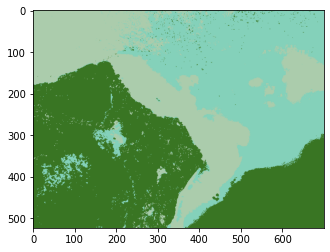

In [89]:
plt.imshow(res);

initial centroids [[109   1 135]
 [ 63 240 217]
 [200 130 117]]
iteration 0
dict_values([[array([ 60, 128,   2], dtype=uint8), array([ 58, 124,  68], dtype=uint8), array([ 38, 104, 135], dtype=uint8), array([ 43, 111,  62], dtype=uint8), array([ 58, 126,  71], dtype=uint8), array([ 36,  90, 136], dtype=uint8), array([ 82,  95, 199], dtype=uint8), array([ 43,  98, 145], dtype=uint8), array([ 32,  90, 144], dtype=uint8), array([ 28, 108, 144], dtype=uint8), array([ 39,  83, 141], dtype=uint8), array([ 23, 128, 141], dtype=uint8), array([ 30,  15, 249], dtype=uint8), array([ 80,  73, 212], dtype=uint8), array([  0,   1, 225], dtype=uint8), array([ 18,  10, 247], dtype=uint8), array([ 27, 117, 135], dtype=uint8), array([ 79,  67, 216], dtype=uint8), array([ 12,  17, 222], dtype=uint8), array([  3,  10, 231], dtype=uint8), array([ 44,  47, 237], dtype=uint8), array([ 32,  36, 249], dtype=uint8), array([ 26, 116, 145], dtype=uint8), array([ 28, 104, 137], dtype=uint8), array([ 77,  68, 215],

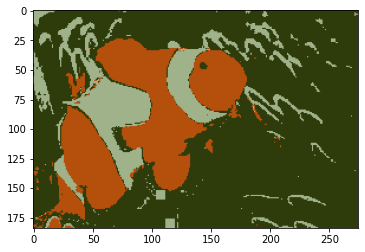

In [95]:
kmean = KMeans(nemo.copy())
nemo_clusterd = kmean.cluster_colors(3)
plt.imshow(nemo_clusterd);

In [ ]:
kmean = KMeans(nemo.copy())
nemo_clusterd = kmean.cluster_colors(3)
plt.imshow(nemo_clusterd);

In [105]:
bird = plt.imread(root+'bird.jpg')
plt.imshow(bird);
kmean = KMeans(bird.copy(), downscale=20)
bird_clusterd = kmean.cluster_colors(5)
plt.imshow(bird_clusterd);

Output hidden; open in https://colab.research.google.com to view.